In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
from datetime import datetime

jtplot.style(theme='monokai', context='talk', fscale=1.4, ticks=True, grid=False, figsize=(6, 4.5), gridlines='--')

In [4]:
df = pd.read_csv('database.csv')

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

In [7]:
df['city, state'] = df['city'] + ', ' + df['state']

In [8]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,"city, state"
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,"Shelton, WA"
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,"Aloha, OR"
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,"Wichita, KS"
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,"San Francisco, CA"
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,"Evans, CO"


In [10]:
ct = pd.crosstab(df['state'], df['threat_level'])

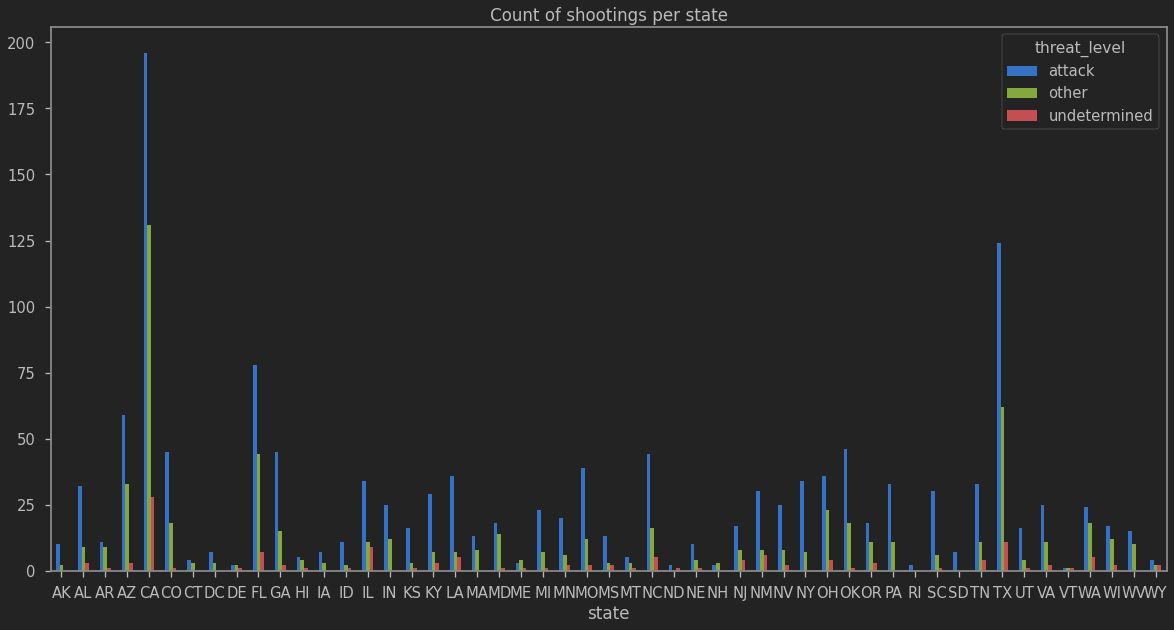

In [11]:
chart_title = 'Count of shootings per state'
ct = pd.crosstab(df['state'], df['threat_level'])


graph = ct.plot.bar(rot = 0, figsize = (20,10), title = chart_title)
fig = plt.gcf()
#fig.savefig('shootings per state.png', dpi=100)

In [14]:
df['threat_level'].drop_duplicates()

0           attack
2            other
15    undetermined
Name: threat_level, dtype: object

In [85]:
summarydf = df[['manner_of_death', 'armed', 'city','state',	'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']]

In [108]:
texasdf = summarydf.loc[(summarydf['state'] == 'TX')]
texasdf = texasdf[['city', 'threat_level']]

In [112]:
texasdf = texasdf.reset_index()

In [116]:
texasdf = texasdf.drop('index', axis = 1)

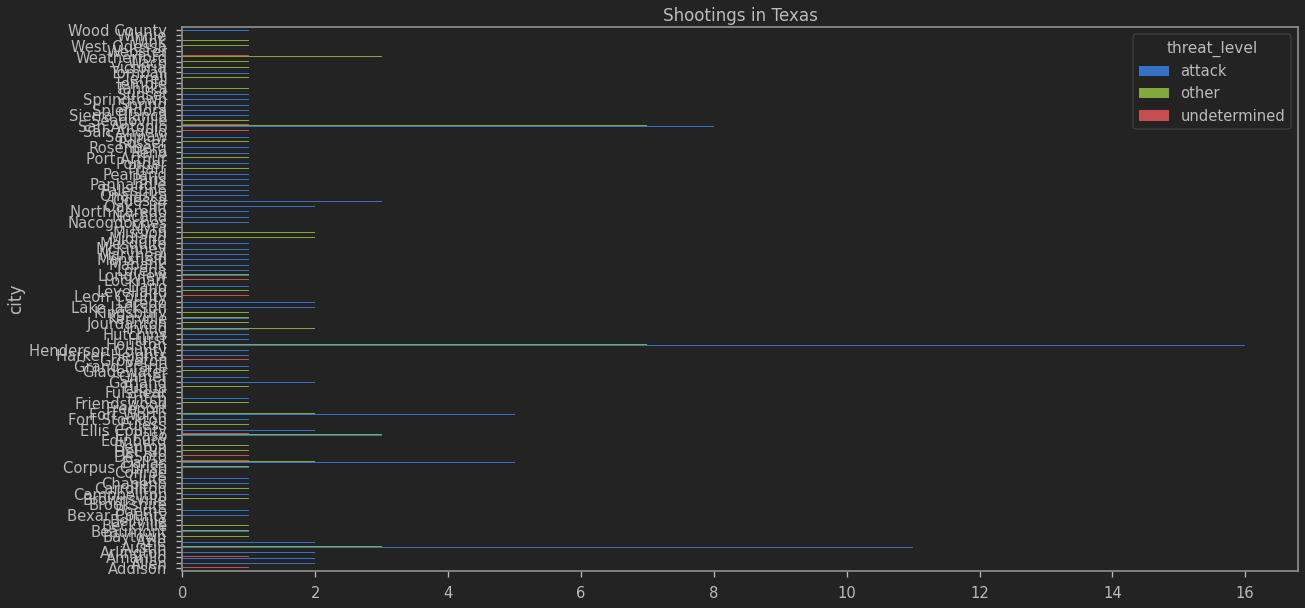

In [122]:
chart_title = 'Shootings in Texas'
#texasdf = summarydf.loc[(summarydf['state'] == 'TX') & (summarydf['city'].count() > 5)]
ct = pd.crosstab(texasdf['city'], texasdf['threat_level'])



graph = ct.plot.barh(rot = 0, figsize = (20,10), title = chart_title)
#graph.set_xticklabels(df['Names'], rotation=90, ha='right')
#plt.xticks(rotation=90)


fig = plt.gcf()
#fig.savefig('shootings per state.png', dpi=100)